In [1]:
pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models


In [8]:
dataset = pd.read_csv('/content/drive/MyDrive/sih/output.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
def hex_to_bytes(hex_string, max_len=256):
    byte_seq = bytes.fromhex(hex_string)
    byte_seq = byte_seq.ljust(max_len, b'\x00')[:max_len]
    return byte_seq


In [ ]:
max_len = 256
byte_sequences = np.array([np.frombuffer(hex_to_bytes(seq, max_len), dtype=np.uint8).reshape(16, 16, 1)
                           for seq in dataset['byte_sequence']])

In [ ]:
label_encoder = LabelEncoder()
algorithms = label_encoder.fit_transform(dataset['algorithm'])

In [ ]:
y = to_categorical(algorithms)
print(byte_sequences.shape)
print(y.shape)

(1000, 16, 16, 1)
(1000, 3)


In [ ]:

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
input_shape = (16, 16, 1)
num_classes = y.shape[1]

cnn_model = create_cnn_model(input_shape, num_classes)
cnn_model.summary()
cnn_model.fit(byte_sequences, y, epochs=10, batch_size=512, validation_split=0.2)


c:\Users\Narayanan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,763 (460.01 KB)

 Trainable params: 117,763 (460.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.2653 - loss: 16.3261 - val_accuracy: 0.3550 - val_loss: 9.5013
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3524 - loss: 8.3478 - val_accuracy: 0.3550 - val_loss: 2.7992
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3720 - loss: 3.0623 - val_accuracy: 0.3100 - val_loss: 4.0458
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3602 - loss: 3.2550 - val_accuracy: 0.6350 - val_loss: 2.2122
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5957 - loss: 2.3507 - val_accuracy: 0.5550 - val_loss: 2.4801
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5627 - loss: 2.3356 - val_accuracy: 0.6750 - val_loss: 0.8637
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6208 - loss: 0.9407 - val_accuracy: 0.3750 - val_loss: 1.5819
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4148 - loss: 1.4275 - val_accuracy: 0.5600 - val_loss: 1.00

In [ ]:
history = cnn_model.fit(byte_sequences, y, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5859 - loss: 0.9460

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5920 - loss: 0.9286 - val_accuracy: 0.6400 - val_loss: 0.6665
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6850 - loss: 0.6074 - val_accuracy: 0.6600 - val_loss: 0.6845
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6853 - loss: 0.6379 - val_accuracy: 0.6450 - val_loss: 0.6563
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6672 - loss: 0.6158 - val_accuracy: 0.6650 - val_loss: 0.6624
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6849 - loss: 0.6207 - val_accuracy: 0.6900 - val_loss: 0.5458
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7215 - loss: 0.5088 - val_accuracy: 0.6850 - val_loss: 0.5987
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7278 - loss: 0.5267 - val_accuracy: 0.6850 - val_loss: 0.5672
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7299 - loss: 0.5116 - val_accuracy: 0.6650 - val_loss: 0.5701
Epoch 9/10

In [ ]:
import matplotlib.pyplot as plt

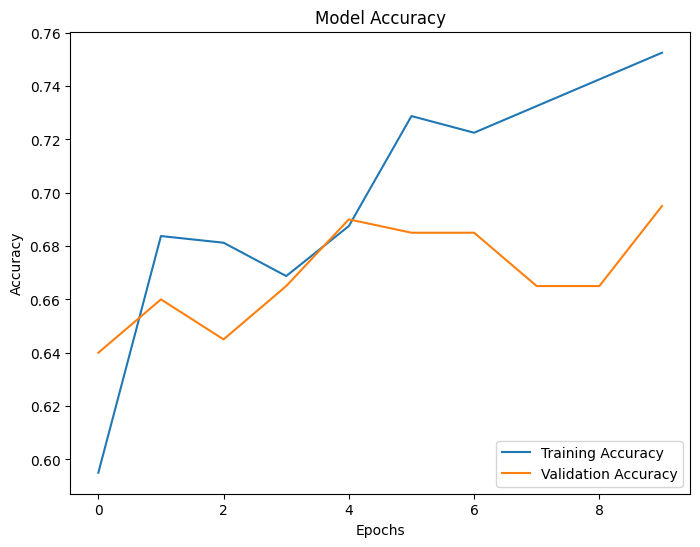

In [ ]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
plot_accuracy(history)

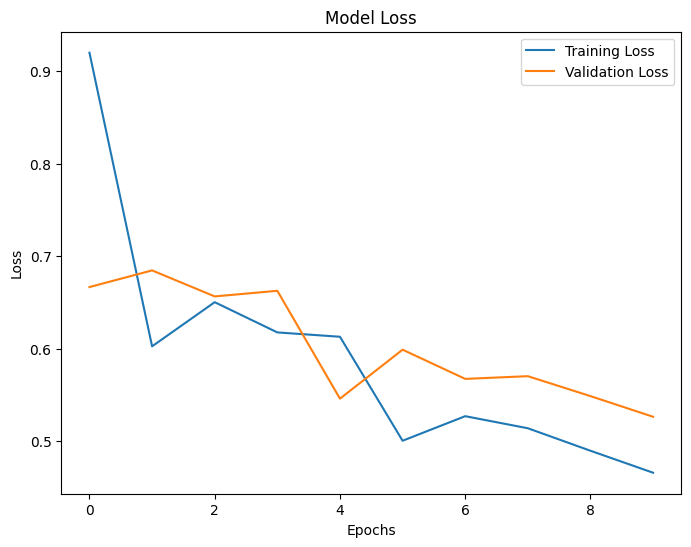

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
plot_loss(history)


In [ ]:
import numpy as np
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:

def create_rnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.SimpleRNN(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(layers.SimpleRNN(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
input_shape = (16, 16)
num_classes = y.shape[1]

byte_sequences_rnn = byte_sequences.reshape(byte_sequences.shape[0], 16, 16)

rnn_model = create_rnn_model(input_shape, num_classes)
rnn_model.summary()

c:\Users\Narayanan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 16, 128)        │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,619 (154.76 KB)

 Trainable params: 39,619 (154.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_rnn = rnn_model.fit(byte_sequences_rnn, y, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 394ms/step - accuracy: 0.3655 - loss: 1.1641 - val_accuracy: 0.5450 - val_loss: 0.9939
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5474 - loss: 0.9850 - val_accuracy: 0.5450 - val_loss: 0.9034
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6023 - loss: 0.8837 - val_accuracy: 0.6150 - val_loss: 0.7183
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6584 - loss: 0.6845 - val_accuracy: 0.6750 - val_loss: 0.5662
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6851 - loss: 0.5313 - val_accuracy: 0.6400 - val_loss: 0.5368
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6545 - loss: 0.4965 - val_accuracy: 0.6900 - val_loss: 0.5080
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6897 - loss: 0.5019 - val_accuracy: 0.6600 - val_loss: 0.4805
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6844 - loss: 0.4692 - val_accuracy: 0.6900 - val_loss: 0.4682

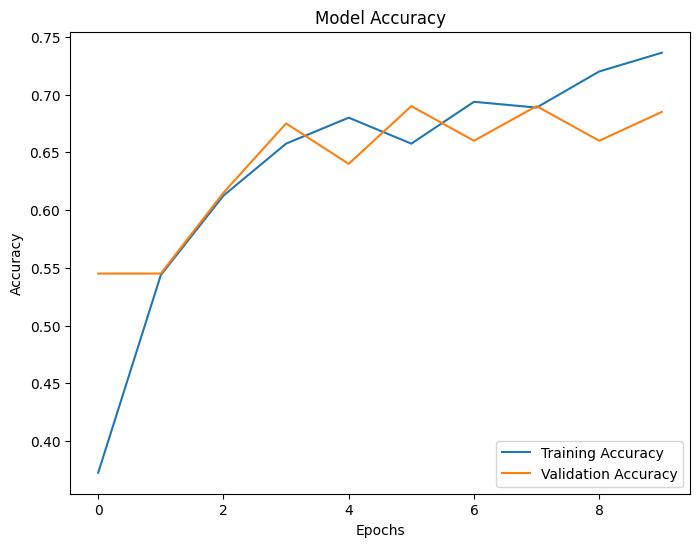

In [ ]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
plot_accuracy(history_rnn)

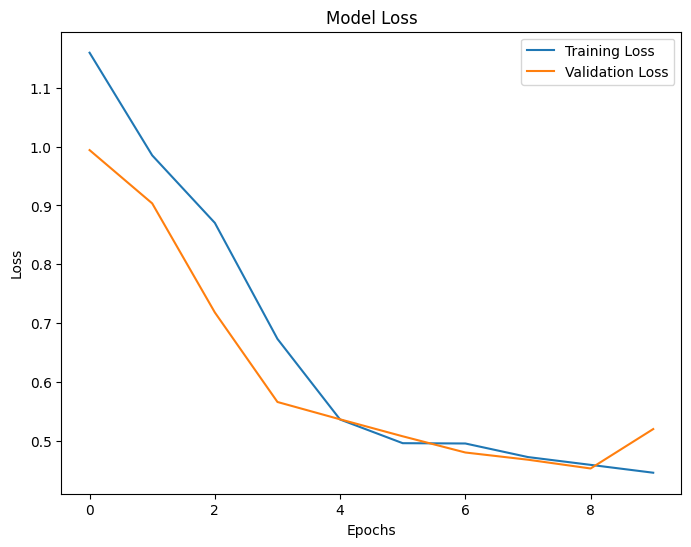

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
plot_loss(history_rnn)


In [ ]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:

def create_cnn(input_shape):
    cnn_input = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(cnn_input)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    cnn_output = layers.Dense(128, activation='relu')(x)

    return Model(cnn_input, cnn_output)


In [ ]:
def create_rnn(input_shape):
    rnn_input = layers.Input(shape=input_shape)

    x = layers.SimpleRNN(128, activation='relu', return_sequences=True)(rnn_input)
    x = layers.SimpleRNN(64, activation='relu')(x)
    rnn_output = layers.Dense(128, activation='relu')(x)

    return Model(rnn_input, rnn_output)


In [ ]:
cnn_input_shape = (16, 16, 1)
rnn_input_shape = (16, 16)
cnn_model = create_cnn(cnn_input_shape)
rnn_model = create_rnn(rnn_input_shape)

In [ ]:
combined_input = layers.concatenate([cnn_model.output, rnn_model.output])
combined_output = layers.Dense(y.shape[1], activation='softmax')(combined_input)

In [ ]:
ensemble_model = Model(inputs=[cnn_model.input, rnn_model.input], outputs=combined_output)
ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ensemble_model.summary()


Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 16, 16, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 16, 16,    │        320 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 8, 8, 32)  │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 8, 8, 64)  │     18,496 │ max_pooling2d_11… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, 16, 16)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 4, 4, 64)  │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_6        │ (None, 16, 128)   │     18,560 │ input_layer_8[0]… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 1024)      │          0 │ max_pooling2d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_7        │ (None, 64)        │     12,352 │ simple_rnn_6[0][… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │    131,200 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │      8,320 │ simple_rnn_7[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 256)       │          0 │ dense_13[0][0],   │
│ (Concatenate)       │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 3)         │        771 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 190,019 (742.26 KB)

 Trainable params: 190,019 (742.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
byte_sequences_cnn = byte_sequences.reshape(byte_sequences.shape[0], 16, 16, 1)  # For CNN
byte_sequences_rnn = byte_sequences.reshape(byte_sequences.shape[0], 16, 16)     # For RNN

In [ ]:
history_ensemble = ensemble_model.fit([byte_sequences_cnn, byte_sequences_rnn], y, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 452ms/step - accuracy: 0.3039 - loss: 20.0162 - val_accuracy: 0.3350 - val_loss: 23.4289
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3600 - loss: 22.2799 - val_accuracy: 0.4100 - val_loss: 9.7856
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4055 - loss: 10.3786 - val_accuracy: 0.3550 - val_loss: 9.3805
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3304 - loss: 8.0947 - val_accuracy: 0.3200 - val_loss: 3.7376
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3155 - loss: 4.0777 - val_accuracy: 0.3250 - val_loss: 5.5517
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3657 - loss: 5.2752 - val_accuracy: 0.3450 - val_loss: 5.5333
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3651 - loss: 4.6207 - val_accuracy: 0.3200 - val_loss: 2.4991
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3805 - loss: 2.1795 - val_accuracy: 0.5400 - val_loss: 1.

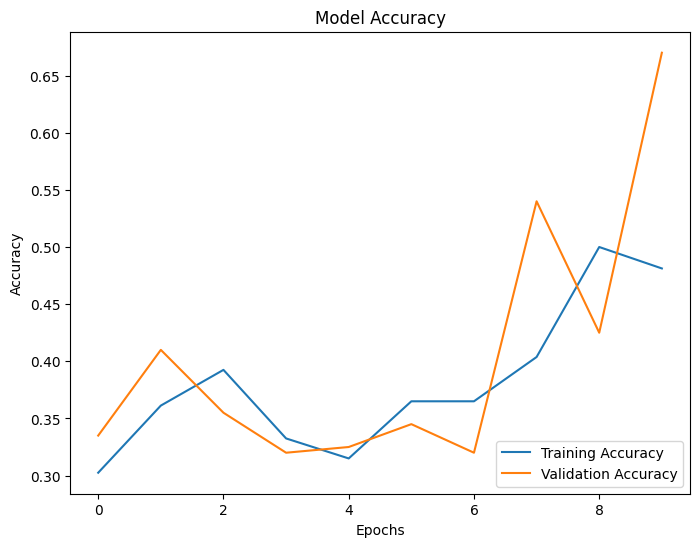

In [ ]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
plot_accuracy(history_ensemble)



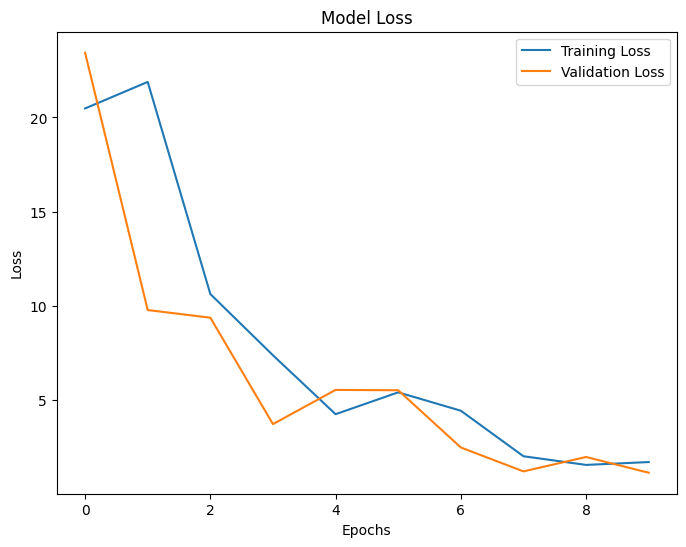

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
plot_loss(history_ensemble)
